In [10]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import h5py as h5

def read_dim_fromfile(name):
    file = h5.File(name, "r")
    Nx = int(file.get("LBE3D").attrs["lbe_sx"][0])
    Ny = int(file.get("LBE3D").attrs["lbe_sy"][0])
    Nz = int(file.get("LBE3D").attrs["lbe_sz"][0])
    dt = int(file.get("LBE3D").attrs["lbe_diag_nsteps"][0])
    t  = int(file.get("LBE3D").attrs["lbe_steps"][0])
    steps = int(t / dt)
    print("Nx Ny Nz = %d %d %d"%(Nx,Ny,Nz))
    print("t : %d;  dt : %d;  steps : %d"%(t,dt,steps))
    return Nx,Ny,Nz,t,dt,steps
    file.close()

def read_field_fromfile(name, field):
    file = h5.File(name, "r")
    f = np.zeros((Nx,Ny,Nz))
    name_field="/LBE3D/"+field
    f[:,:,:] = file.get(str(name_field))[...]
    file.close()
    return f

SAVE = False
test = "SCMP_SIN_WALL_MAYO"

direc = "/home/matti/programming/lbe-direct/src/tests/"+test+"/RUN/"
print("Creation of the RUN/ folder: "+time.ctime(os.path.getctime(direc)))

name=direc+"density_t.0.h5"
Nx,Ny,Nz,tf,dt,steps = read_dim_fromfile(name)

rho1 = np.zeros((steps,Nx,Ny,Nz)); rho1[:,:,:,:] = np.nan;
#rho2 = np.zeros((steps,Nx,Ny,Nz)); rho2[:,:,:,:] = np.nan;
vx = np.zeros((steps,Nx,Ny,Nz)); vx[:,:,:,:] = np.nan;
#vy = np.zeros((steps,Nx,Ny,Nz)); vy[:,:,:,:] = np.nan;
#vz = np.zeros((steps,Nx,Ny,Nz)); vz[:,:,:,:] = np.nan;
#v2 = np.zeros((steps,Nx,Ny,Nz)); v2[:,:,:,:] = np.nan;

for i in range(0,steps):
    t = i*dt
    name=direc+"density_t.%d.h5"%t
    #print(name)
    rho1[i,:,:,:] = read_field_fromfile(name,"rho1")
    #rho2[i,:,:,:] = read_field_fromfile(name,"rho2")
    name=direc+"velocity_t.%d.h5"%t
    vx[i,:,:,:] = read_field_fromfile(name,"vx")
    #vy[i,:,:,:] = read_field_fromfile(name,"vy")
    #v2[i,:,:,:] = vx[i,:,:,:]*vx[i,:,:,:]+vy[i,:,:,:]*vy[i,:,:,:]+vz[i,:,:,:]*vz[i,:,:,:]


Creation of the RUN/ folder: Fri May 23 09:01:30 2025
Nx Ny Nz = 64 64 64
t : 4000;  dt : 10;  steps : 400


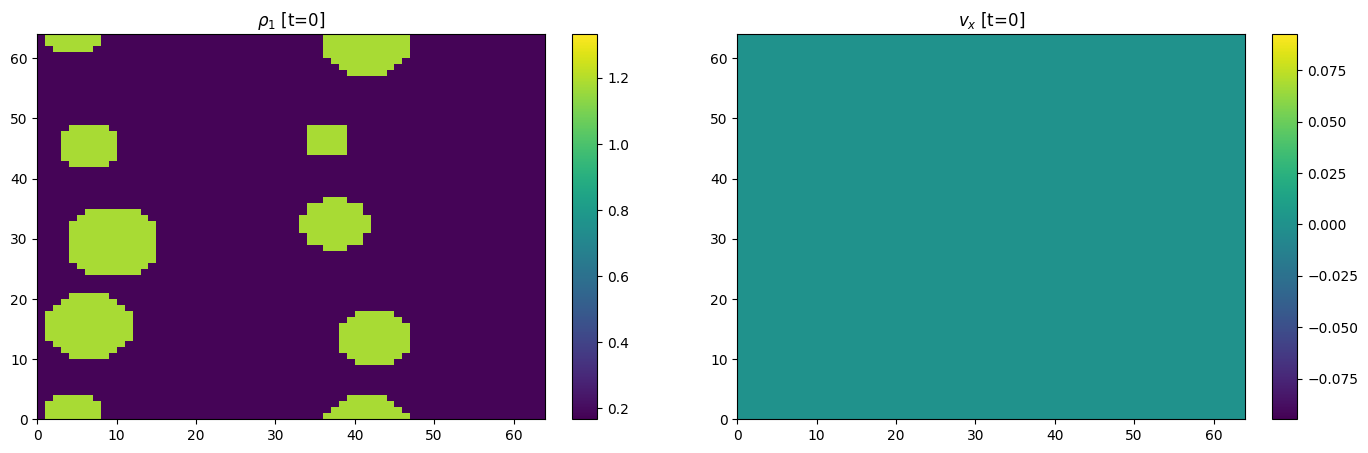

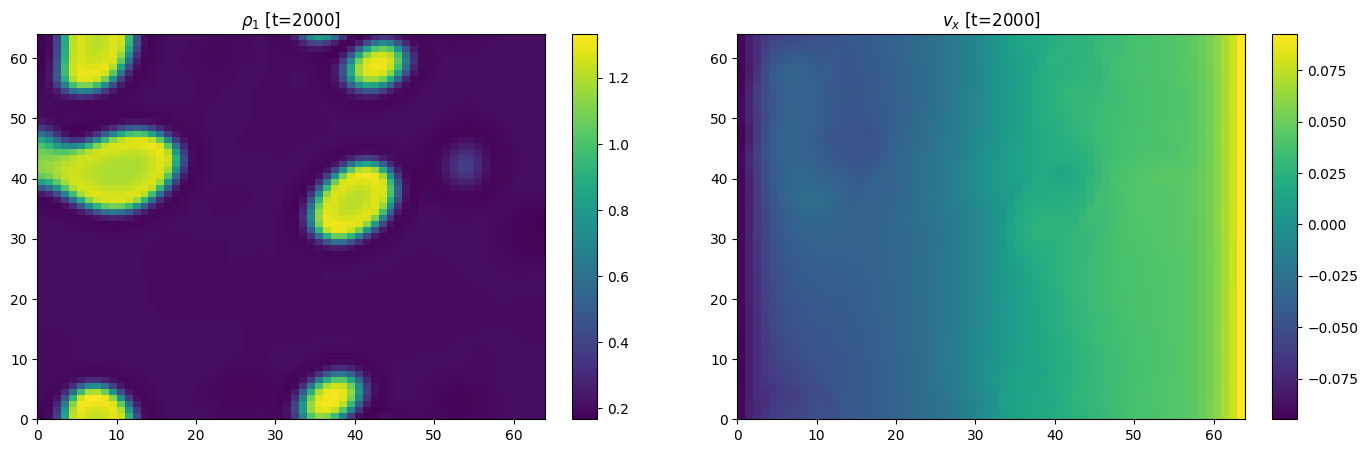

In [11]:
def plot_cutcut(i, f, title):
    _ = plt.figure(i, figsize=[5,5])
    _ = plt.plot(f[:,cut,cut])
    #_ = plt.grid()
    #_ = plt.xticks((np.linspace(0,Nx-1,int(Nx/4),dtype=np.int16)))
    _ = plt.title(title)

def plot_f(i, f, title):
    _ = plt.figure(i, figsize=[5,5])
    _ = plt.pcolormesh(f[:,:,cut])
    _ = plt.colorbar()
    _ = plt.grid()
    _ = plt.xticks((np.linspace(0,Ny,Ny+1,dtype=np.int16)))
    _ = plt.yticks((np.linspace(0,Nx,Nx+1,dtype=np.int16)))
    _ = plt.title(title)

def plot_2f(f1, f2, i, title1, title2, vm1, vM1, vm2, vM2):
    n=1 ; COL=2 ; RIG=1 
    fig = plt.figure(i, figsize=[n*7*COL,n*5*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.45)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.55, right=0.95)#, hspace=0)
    axs2 = gs2.subplots()
    if vm1=='no':
        vm1 = np.min(f1); vM1 = np.max(f1)
    C = axs1[0].pcolormesh(f1, vmin=vm1, vmax=vM1, cmap="viridis")
    _ = axs1[0].set_title(title1)
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm1, vmax=vM1), cmap = C.cmap)
    if vm2=='no':
        vm2 = np.min(f2); vM2 = np.max(f2)
    C = axs2[0].pcolormesh(f2, vmin=vm2, vmax=vM2, cmap="viridis")
    _ = axs2[0].set_title(title2)
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm2, vmax=vM2), cmap = C.cmap)
    if(SAVE):
        _ = plt.savefig(direc+str(i))
        _ = plt.close()

def plot_3f(f1, f2, f3, i, title1, title2, title3):
    n=1 ; COL=2 ; RIG=1
    fig = plt.figure(i, figsize=[n*8*COL,n*4.8*2*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.3)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.37, right=0.63)#, hspace=0)
    axs2 = gs2.subplots()
    gs3 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.7, right=0.95)#, hspace=0)
    axs3 = gs3.subplots()
    vm = np.min(f1[:,:,cut]); vM = np.max(f1[:,:,cut])
    C = axs1[0].pcolormesh(f1[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(title1)
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    vm = np.min(f2[:,:,cut]); vM = np.max(f2[:,:,cut])
    C = axs2[0].pcolormesh(f2[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs2[0].set_title(title2)
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    #vm = np.min(f3[:,:,cut]); vM = np.max(f3[:,:,cut])
    vm = -1; vM = +1
    C = axs3[0].pcolormesh(f3[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs3[0].set_title(title3)
    _ = matplotlib.colorbar.ColorbarBase(axs3[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)

def plot3D_(f, i, title):
    fp = np.copy(f);
    fp[fp < 0.5] = np.nan;
    n=1;
    fig = plt.figure(figsize = (n*7,n*7))
    ax = plt.axes(projection='3d')
    #_ = ax.contour(fp, extend3d=True)
    _ = ax.plot_surface(fp, cmap='viridis')
    _ = plt.title(title)
    

# plot_f(1,flaggeometry,"flaggeometry")
# plot_f(2,flag,"flag")
# plot_f(3,rhoN,"rhoN")
#plot_3f(flaggeometry, flag, rhoN0, 1, "flaggeometry", "flag", "rhoN0")
#plot_3f(rhoN0, rhoN1, rhoN2, 2, "rhoN t=0", "rhoN t=1", "rhoN t=2")

cut = int(Nz*0.5)
field1 = rho1[:,:,cut,:]
field2 = vx[:,:,cut,:]

RR = range(0,steps,200)

minv1 = np.min(field1[RR,:,:]); maxv1 = np.max(field1[RR,:,:])
minv2 = np.min(field2[RR,:,:]); maxv2 = np.max(field2[RR,:,:])

for i in RR:
    #plot3D_(rho1[i,:,:,:],i,"rho1 t=%d"%i*dt)
    #plot_f(i,rho1[i,:,:,:],"rho1 t=%d"%i*dt)
    plot_2f(field1[i,:,:], field2[i,:,:], i, r"$\rho_1$ [t=%d]"%(i*dt), r"$v_x$ [t=%d]"%(i*dt), minv1, maxv1, minv2, maxv2)
    #plot_2f(field1[i,:,:], field2[i,:,:], i, "rho1 t=%d"%(i*dt), "vx t=%d"%(i*dt), 'no', 0, 'no', 0)
    #plot_cutcut(i,rho1[i,:,:,:],"rho1 t=%d"%(i*dt))

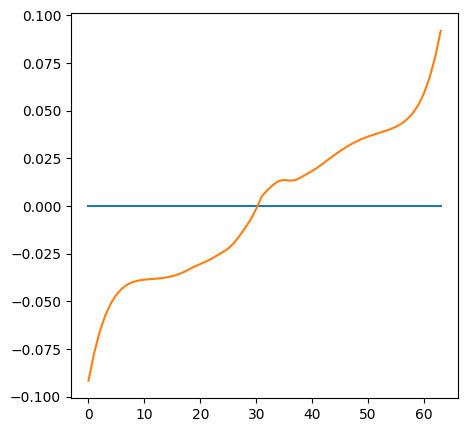

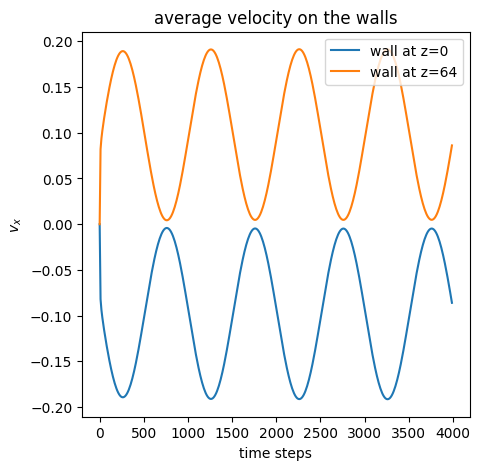

In [21]:
def plot_vprof(v,t,i):
    _ = plt.figure(i, figsize=[5,5])
    _ = plt.plot(v[t,16,16,:])
for i in RR:
    plot_vprof(vx, i, 0);

XX = range(0,t+1,dt)
_ = plt.figure(1, figsize=[5,5])
_ = plt.plot(XX,np.average(vx[:,:,:,0],axis=(1,2)),label="wall at z=0")
_ = plt.plot(XX,np.average(vx[:,:,:,-1],axis=(1,2)),label="wall at z=%d"%Nz)
_ = plt.xlabel("time steps")
_ = plt.ylabel(r"$v_x$")
_ = plt.legend()
_ = plt.title("average velocity on the walls")

In [28]:
filenames=[]
for i in RR:
    filenames.append(direc+str(i)+".png")

# with imageio.get_writer(savedir+"movie.gif", mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(direc+'movie.gif',images,loop=0,duration=0.01)

/tmp/ipykernel_53494/2830804162.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [29]:
filenames=[]
for i in RR:
    filenames.append(direc+str(i)+".png")
for filename in filenames:
    os.remove(filename)